In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')

display(df.head())

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df['Electric Range'].dropna(),bins = 50, kde = True)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Display car models with zero electric range
zero_range_cars = df[df['Electric Range'] == 0]

# Display the result
print(zero_range_cars[['Make', 'Model', 'Electric Range']])


          Make    Model  Electric Range
24        FORD    F-150             0.0
28       TESLA  MODEL Y             0.0
30       TESLA  MODEL Y             0.0
41      RIVIAN      R1S             0.0
54       TESLA  MODEL Y             0.0
...        ...      ...             ...
210156   TESLA  MODEL Y             0.0
210158   TESLA  MODEL Y             0.0
210159     KIA      EV6             0.0
210163   TESLA  MODEL 3             0.0
210164   TESLA  MODEL Y             0.0

[118654 rows x 3 columns]


In [22]:
# Filter the dataset for the model "F-150" and display its electric vehicle type
f150_ev_type = df[df['Model'] == "F-150"]

# Display the relevant columns
print(f150_ev_type[['Make', 'Model', 'Electric Vehicle Type']])

print(len(df))

        Make  Model           Electric Vehicle Type
24      FORD  F-150  Battery Electric Vehicle (BEV)
166     FORD  F-150  Battery Electric Vehicle (BEV)
724     FORD  F-150  Battery Electric Vehicle (BEV)
748     FORD  F-150  Battery Electric Vehicle (BEV)
895     FORD  F-150  Battery Electric Vehicle (BEV)
...      ...    ...                             ...
209921  FORD  F-150  Battery Electric Vehicle (BEV)
209951  FORD  F-150  Battery Electric Vehicle (BEV)
209974  FORD  F-150  Battery Electric Vehicle (BEV)
210024  FORD  F-150  Battery Electric Vehicle (BEV)
210080  FORD  F-150  Battery Electric Vehicle (BEV)

[2387 rows x 3 columns]
210165


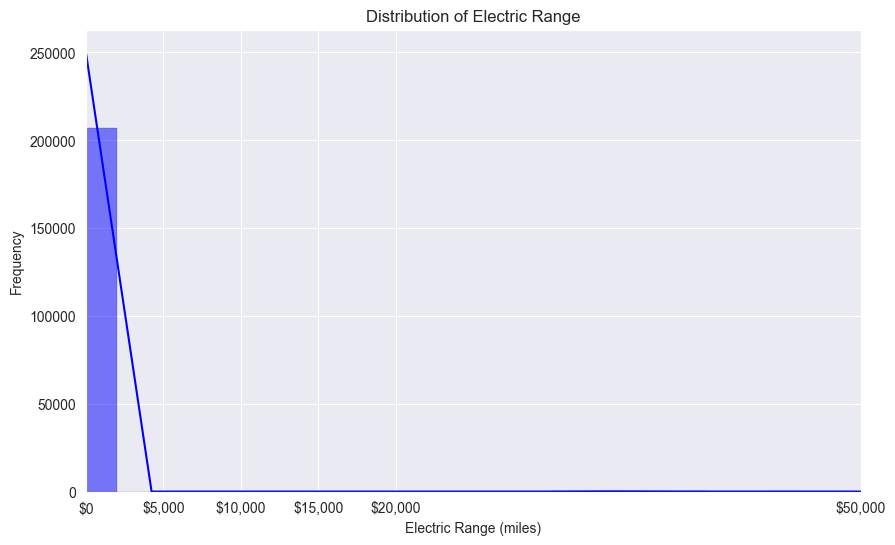

In [29]:
plt.figure(figsize=(10,6))

sns.histplot(df['Base MSRP'].dropna(), bins=30, kde=True, color='blue', edgecolor='black', binwidth=2000)
ticks = [0, 5000, 10000, 15000, 20000, 50000, 60000]  # Specify your desired tick locations
plt.xticks(ticks, [f'${tick:,.0f}' for tick in ticks])  # Format labels as currency
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.xlim(0,50000)
plt.show()

In [ ]:
# Count the number of rows where 'base_msrp' is zero
zero_price_count = df[df['Base MSRP'] == 0].shape[0]

print(f"Number of vehicles with zero base MSRP: {zero_price_count}")


In [ ]:
#print(df['Base MSRP'].describe())
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')
car_counts_Cty = df['City'].value_counts().nlargest(10)


car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()


car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')


<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

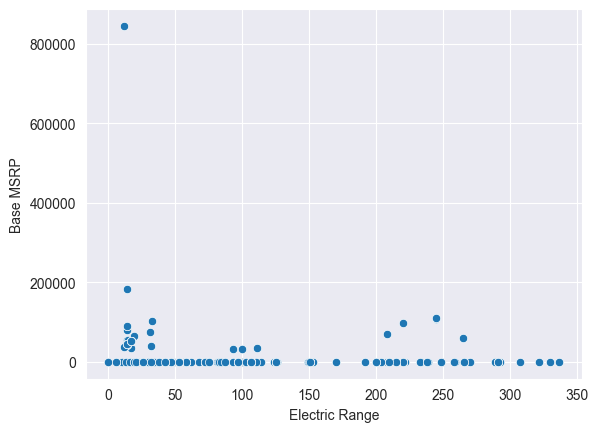

In [55]:
sns.scatterplot(data=df, x="Electric Range", y="Base MSRP")

<Axes: xlabel='Electric Range', ylabel='Model Year'>

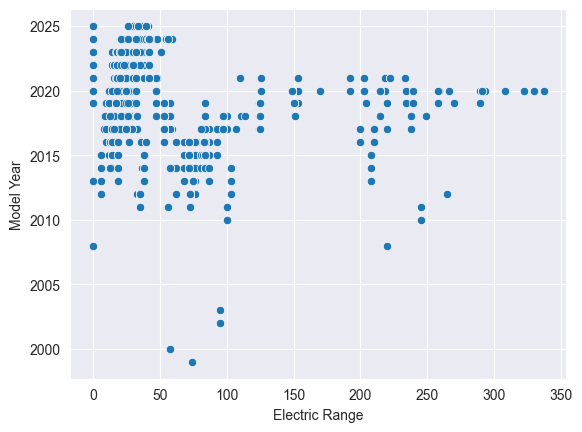

In [56]:
sns.scatterplot(data = df, x = 'Electric Range', y = 'Model Year')

In [ ]:

car_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
most_popular_car = car_counts.loc[car_counts['Count'].idxmax()]
popular_car_make = most_popular_car['Make']
popular_car_model = most_popular_car['Model']
popular_car_registrations = df[(df['Make'] == popular_car_make) & (df['Model'] == popular_car_model)]
city_counts = popular_car_registrations['City'].value_counts().reset_index(name='Count')
city_counts.columns = ['City', 'Count']
top_cities = city_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Registrations')
plt.title(f'Top 10 Cities with Most Registrations of {popular_car_make} {popular_car_model} (Most Popular Car)')
plt.tight_layout()
plt.show()

print(f"The most popular car model is {popular_car_make} {popular_car_model}.")